In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Plot settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,5)


In [3]:
# 📂 Load dataset  (download from UCI repository or Kaggle)
# File name could be 'data_banknote_authentication.csv'
df = pd.read_csv('data_banknote_authentication.csv')

# View first rows
df.head()


,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [4]:
# Check dataset info
print(df.info())

# Check missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Basic statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   3.6216    1371 non-null   float64
 1   8.6661    1371 non-null   float64
 2   -2.8073   1371 non-null   float64
 3   -0.44699  1371 non-null   float64
 4   0         1371 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None

Missing values per column:
 3.6216      0
8.6661      0
-2.8073     0
-0.44699    0
0           0
dtype: int64


,3.6216,8.6661,-2.8073,-0.44699,0
count,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000
mean,0.431410,1.917434,1.400694,-1.192200,0.444931
std,2.842494,5.868359,4.310105,2.101683,0.497139
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.774700,-1.711300,-1.553350,-2.417000,0.000000
50%,0.495710,2.313400,0.616630,-0.586650,0.000000
75%,2.814650,6.813100,3.181600,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [5]:
df.columns = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']
df.head()


,Variance,Skewness,Curtosis,Entropy,Class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


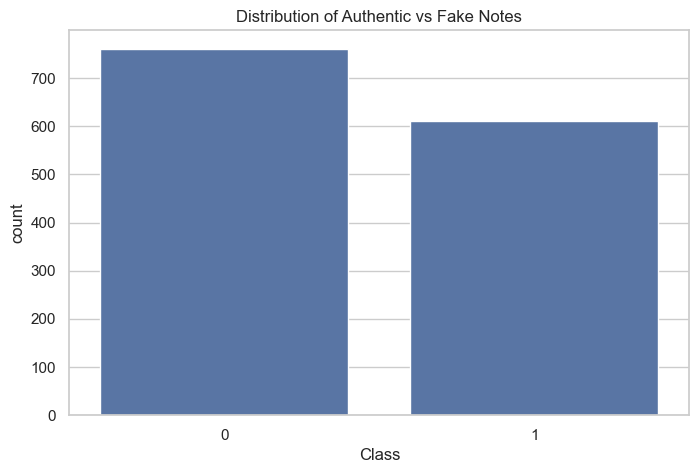

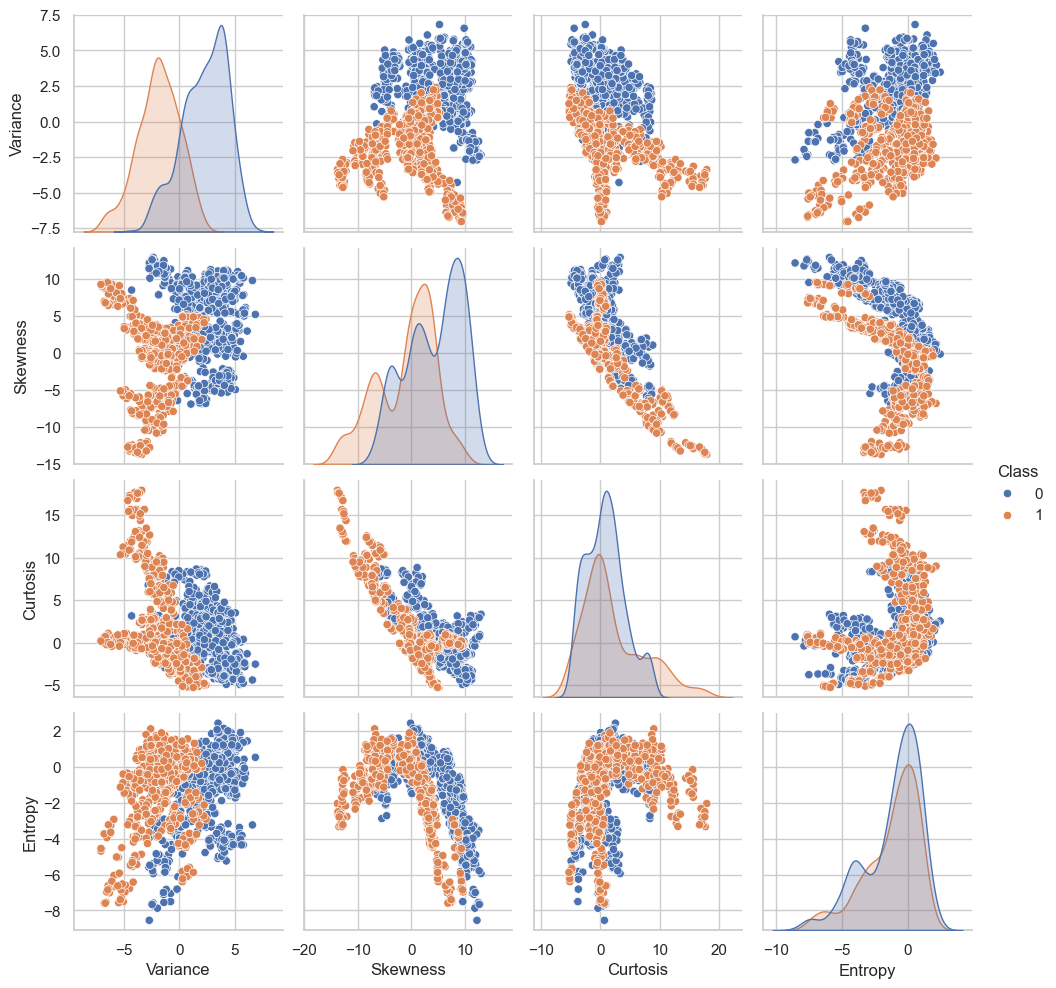

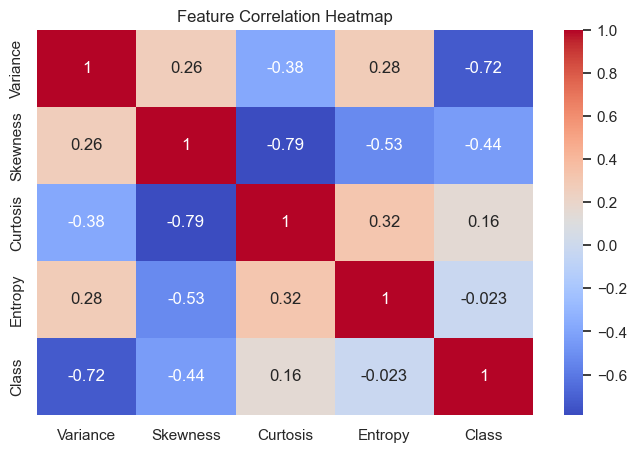

In [6]:
# Class distribution
sns.countplot(x='Class', data=df)
plt.title("Distribution of Authentic vs Fake Notes")
plt.show()

# Pairplot to visualize feature relationships
sns.pairplot(df, hue='Class')
plt.show()

# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [7]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [8]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.9927272727272727
[[151   2]
 [  0 122]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       153
           1       0.98      1.00      0.99       122

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [9]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9963636363636363
[[152   1]
 [  0 122]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       153
           1       0.99      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



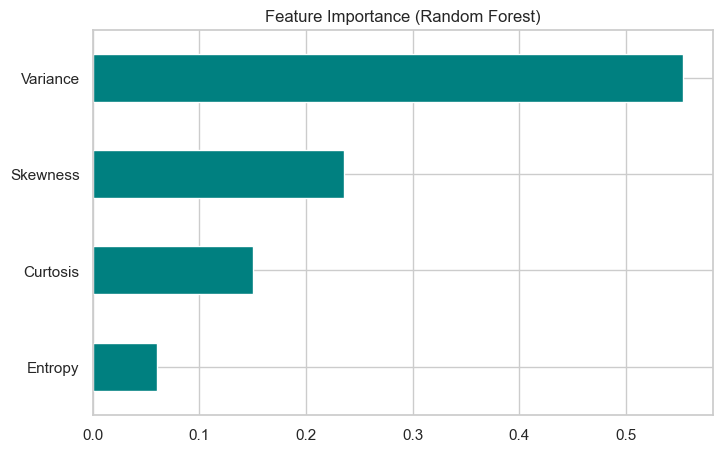

In [10]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', color='teal')
plt.title("Feature Importance (Random Forest)")
plt.show()
